# High Performance Computing Features

Traditionally, the worlds of high-performance computing (HPC) and modular software design have been considered mutually exclusive. HPC often demands intricate, low-level optimizations, making the code hard to modularize or even understand. On the flip side, modular design, which thrives on separation of concerns and reusability, has often had to sacrifice performance for the sake of clean, maintainable code.  However, modern software technologies, including the features of high-level languages like Python, are slowly erasing this dichotomy. Pyxu capitalizes on these advancements to offer a computational imaging platform that doesn't compromise on either modularity or performance.

## The Conundrum of Performance vs Modularity

Achieving peak performance traditionally meant that you had to write highly specialized, monolithic software, sacrificing modularity for the sake of computational speed. This is particularly true in High-Performance Computing (HPC) environments where every millisecond counts. Such software, while incredibly fast, becomes rigid, harder to maintain, and highly tailored for specific tasks. The moment you need to adapt the software to new requirements or integrate it with other tools, the lack of modularity becomes a bottleneck.

## Why High-Level Languages Like Python?
Python, and other high-level languages, offer intrinsic features that facilitate modularity:

* **Easy-to-Read Syntax:**  High-level languages are known for their easy-to-read syntax, and Python is a prime example. The language's design encourages writing clean, readable, and therefore, maintainable code (see [PEP8](https://peps.python.org/pep-0008/) for example). This readability naturally promotes modular programming and collaboration. 

* **Dynamic Typing and Polymorphism:** Python, like many high-level languages, offers [dynamic typing and polymorphism](https://www.wikiwand.com/en/Polymorphism_(computer_science)). These features allow developers to write more flexible, general-purpose modules. Such flexibility can be a boon for quick prototyping and can also make the codebase more adaptable to changes, further promoting the concept of modularity.

* **Rich Standard Libraries:** The extensive collection of standard libraries in Python reduces the need to write boilerplate code, allowing developers to focus on building application-specific modules. The standard libraries themselves are often highly modular, serving as excellent examples of how to design modular software.

* **Functional and Object-Oriented Programming Support:** Python supports multiple programming paradigms, including both functional and object-oriented programming (OOP). These paradigms offer different approaches to modularization. While OOP focuses on encapsulating state and behavior, functional programming emphasizes stateless operations, both contributing to cleaner, more modular code.

* **C/C++/Fortran Bindings:** Python's ability to interface with low-level optimized or compiled libraries provides a powerful path for achieving high performance while retaining high-level simplicity and modularity. This opens the door for leveraging performance-optimized code without losing Python's inherent advantages. 

## Pyxu's Modern Take on HPC

Pyxu is designed to change the narrative, standing at the intersection of modularity and performance. Leveraging the best of Python's modularity features and marrying them with state-of-the-art computational technologies, Pyxu proves that you can indeed have the best of both worlds. This transformative approach provides the scientific community with a tool that is not just robust and fast but also flexible and future-proof.

By building upon a bedrock of vibrant technologies from the PyData stack, Pyxu showcases that modularity and performance are not mutually exclusive but can co-exist harmoniously in a well-designed software ecosystem. 

## High-Performance Computing Features in Pyxu

### Precision Context Manager

[Compute precision](https://en.wikipedia.org/wiki/Numerical_precision) is a critical aspect of numerical computations, denoting the exactness or resolution of the computational process. In the world of floating-point arithmetic, higher precision means more bits representing numbers, which in turn means greater accuracy but at the cost of computational speed.

By incorporating a precision context manager, Pyxu empowers users to dynamically alter compute precision, thereby granting more control over the trade-off between speed and accuracy.

```python
import pyxu.runtime as pxrt

pxrt.getPrecision()                      # Width.DOUBLE is the default precision
with pxrt.Precision(pxrt.Width.SINGLE):
    pxrt.getPrecision()                  # Width.SINGLE for local change of compute precision
pxrt.getPrecision()                      # Width.DOUBLE (back to default out of the context manager's scope
```

### Just-In-Time (JIT) Compilation

Unlike traditional Ahead-Of-Time (AOT) compilation, which compiles the codebase before execution, [Just-In-Time Compilers](https://en.wikipedia.org/wiki/Just-in-time_compilation) compile parts of a program during its actual execution. This dynamic compilation optimizes performance based on real-time behavior.

By employing [Numba](https://numba.pydata.org/), Pyxu harnesses JIT compilation's power, ensuring that compute-intensive components are optimized during runtime. This methodology yields near-native performance, making Python as performant as statically-typed languages for computational imaging tasks.

### Vectorized Operations

In computational terms, [vectorization](https://en.wikipedia.org/wiki/Array_programming) denotes the parallel processing of multiple data elements rather than iterating over them. It's a strategy to exploit data-level parallelism in lieu of task-level parallelism.

Pyxu's operators are intrinsically vectorized, which means they are optimized to handle stacks of data in parallel. This design strategy significantly enhances efficiency for tasks involving data batches, as frequently seen in imaging.

### Module-Agnostic Infrastructure

Modern computational trends emphasize array-agnostic programming. This concept of array-agnosticism promotes modularity and portability as you can swap out underlying data structures without rewriting higher-level code. With the emerging [array-API standard in Python](https://data-apis.org/array-api/latest/) and platforms like [Intel's oneAPI](https://www.oneapi.com/), this philosophy is increasingly essential for interoperable and scalable numerical computing solutions.

Pyxu is meticulously crafted to be module-agnostic. Its inherent architecture ensures seamless interaction with array libraries such as NumPy, CuPy, and Dask, providing unparalleled flexibility and portability.

### NumPy and Its Siblings: CuPy and Dask
NumPy is The de facto standard for array computing in Python, offering excellent support for a broad range of mathematical operations.
CuPy and Dask extend NumPy to GPUs and out-of-core and distributed computing, respectively. 

#### Embracing GPU Computing with CuPy

Graphical Processing Units (GPUs) have transitioned from graphical renderings to a [broader computational domain](https://en.wikipedia.org/wiki/General-purpose_computing_on_graphics_processing_units), credited to their ability to perform parallel operations. For large-scale computations like image processing, GPUs can offer significant performance enhancements over traditional CPU-centric computations.

By integrating [CuPy](https://cupy.dev/), Pyxu taps into GPU-accelerated numerical operations. A salient point in GPU computing is the overhead of data transfers between CPU and GPU. To maximize performance, it's imperative to minimize these transfers, a philosophy that Pyxu staunchly adheres to via zero-copy dispatch mechanisms.

#### Distributed and Out-of-core Computing with Dask

[Dask](https://dask.org/) is a beacon for parallel computing in Python. It seamlessly scales Python's eco-system, extending libraries to handle computations that outstrip memory constraints. It does so via lazy computing and chunking:

1. **Lazy Computing**: Instead of immediate computations, Dask builds a computation graph. It then evaluates this graph optimally, ensuring resource efficiency.
2. **Chunking**: Dask fragments large arrays into smaller, manageable "chunks", then performs computations on these in parallel, optimizing both memory and compute resources.

Leveraging Dask's prowess, Pyxu can execute imaging computations efficiently across multi-core CPUs/GPUs and distributed computing setups. The synergy between Pyxu and Dask's scheduler ensures that computational resources are judiciously utilized, streamlining the most complex imaging tasks.

## Hands-on Example:

As an example, consider the following code snippet, defining the median operator:


In [1]:
from pyxu.abc import Map
from pyxu.util import get_array_module
from pyxu.runtime import enforce_precision


class Median(Map):
    def __init__(self, dim):
        super(Median, self).__init__(shape=(1, dim))

    # Enforce input/output precision.
    @enforce_precision(i="arr")
    def apply(self, arr):
        # Find the array module.
        xp = get_array_module(arr)
        return xp.median(arr, axis=-1, keepdims=True) 
        # Dispatch the median call to the right backend
        # Allow for batch dimensions.

This operator can then be fed various arrays as inputs:

In [6]:
import time as t
from pyxu.util.deps import supported_array_modules
from pyxu.util import compute

timings = dict()
m = Median()
for xp in supported_array_modules(): # Loops over supported array backends
    # Apply the operator in turn on a various array types.
    t1 = t.time()
    arr = xp.arange(260).reshape(20, 13)
    out = compute(m.apply(arr))
    timings[xp.__name__] = t.time() - t1
print(timings)

{'numpy': 0.0005955696105957031, 'cupy': 2.3291730880737305, 'dask.array': 0.0022661685943603516}


If called from within the context manager ``Precision``, the decorated apply method will automatically coerce the input/output to the user-specified precision:

In [7]:
%%timeit
with pxrt.Precision(Width.SINGLE):
    # Single precision is used for the computation
    out = m.apply(np.arange(260).reshape(20, 13))

37.3 µs ± 610 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [8]:
%%timeit
with pxrt.Precision(Width.DOUBLE):
    # Double precision is used for the computation
    out = m.apply(np.arange(260).reshape(20, 13))  

37.4 µs ± 117 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


The support for Dask array inputs also allows to trivially parallelize computation. Consider for example the hierarchical median operator below:  

In [10]:
class HierarchicalMedian(Median):
    
    def apply(self, arr):
        xp = get_array_module(arr)
        out = []
        for i, j in zip(range(0, arr.shape[-1], 10), range(10, arr.shape[-1], 10)):
            out.append(super().apply(arr[..., i:j]))
        return super().apply(xp.concatenate(out, axis=-1))

There is obviously huge opportunity for parallelism, as shown by the underlying Dask compute graph: 

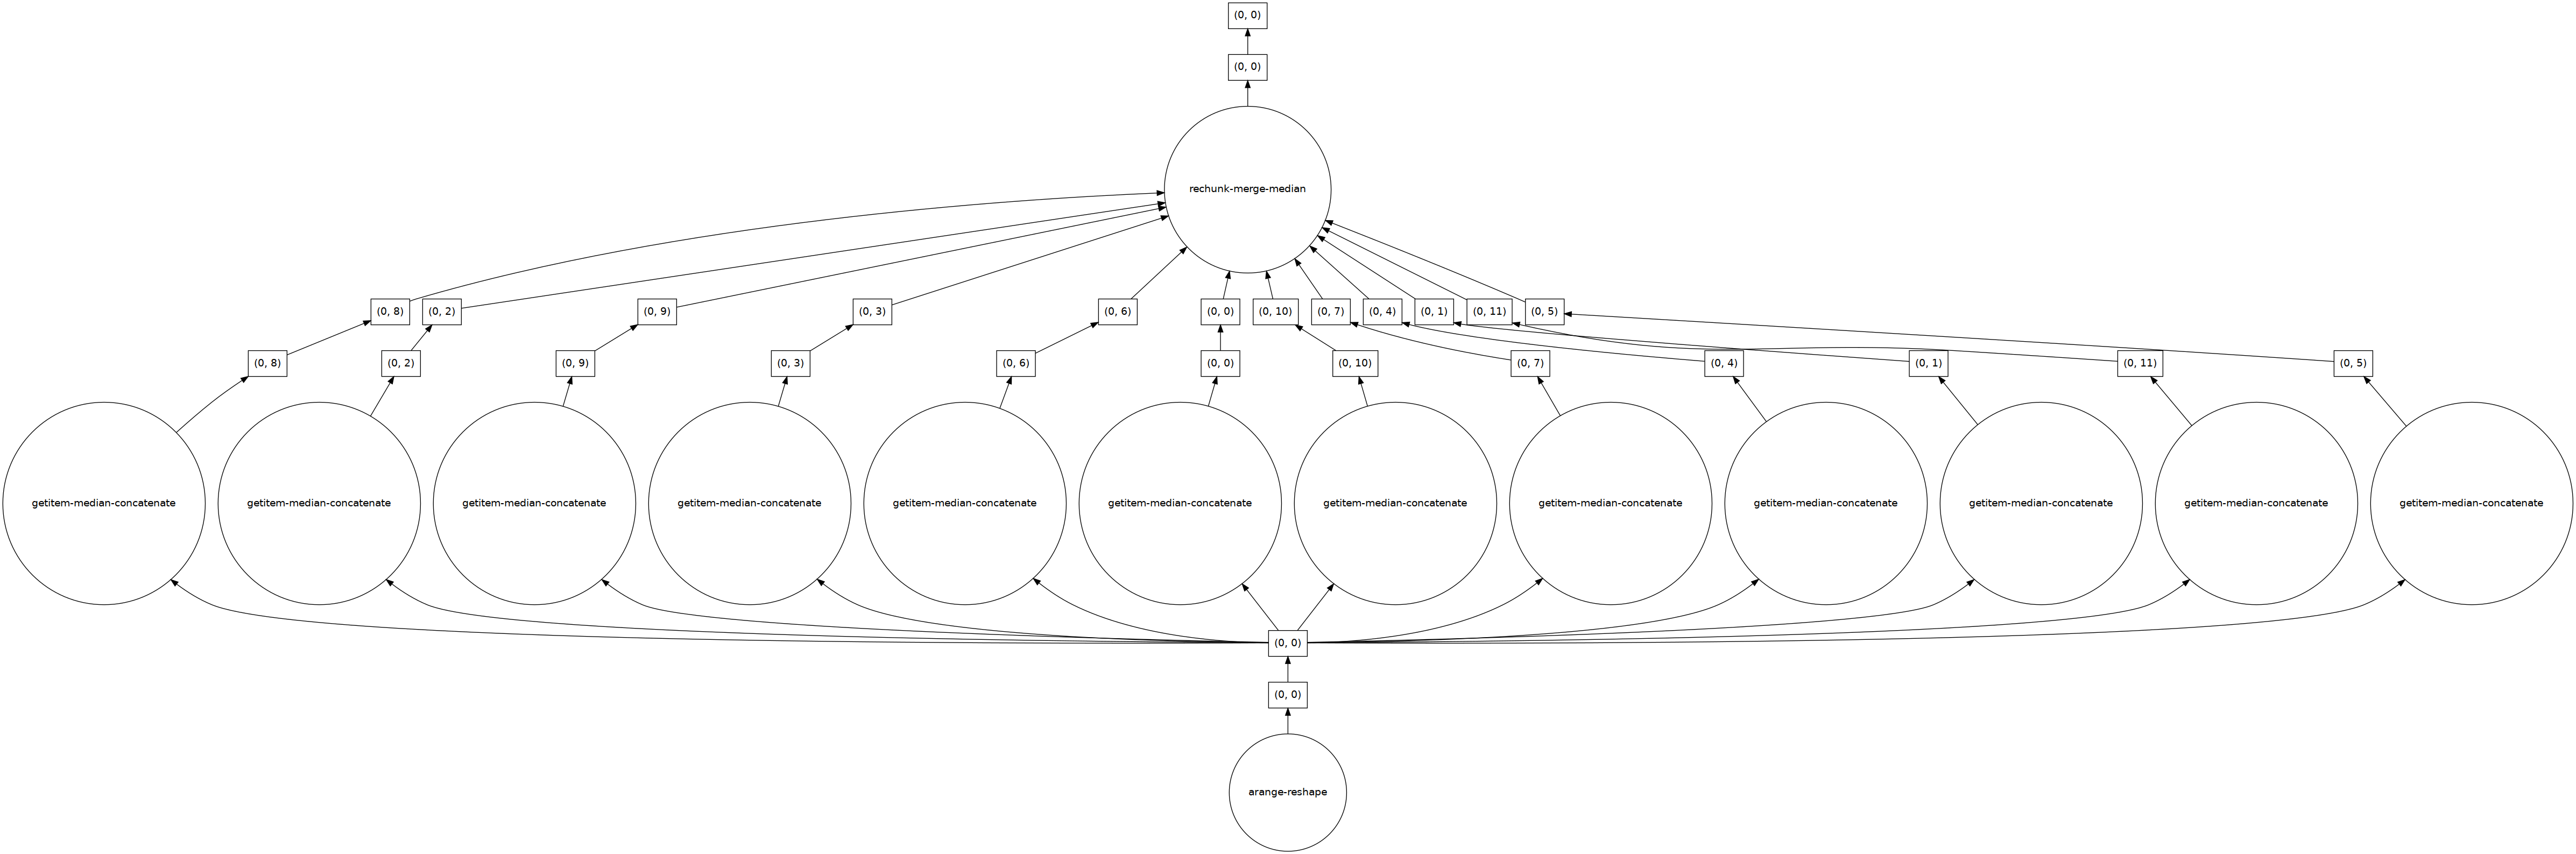

In [11]:
hm = HierarchicalMedian()
hm(da.arange(2600).reshape(20, 130)).visualize(optimize_graph=True)

Feeding the operator with Dask arrays will automatically distribute the computation for us (note that in this case this does not provide any speed up):

In [12]:
timings = dict()
for xp in supported_array_modules():
    t1 = t.time()
    out = compute(hm.apply(xp.arange(2600).reshape(20, 130)))
    timings[xp.__name__] = t.time()-t1
print(timings)    

{'numpy': 0.0024390220642089844, 'cupy': 0.007131814956665039, 'dask.array': 0.01573467254638672}


This is very convenient for the developer, who can focus on the functionality and defer prallelism concerns to Dask. 

## Final thoughts

Pyxu stands at the intersection of modularity and performance, driven by the power of high-level languages and modern HPC tools. The array-agnostic nature of its architecture embodies the future of numerical computing—flexible, interoperable, and performant. With its focus on computational imaging, Pyxu aims to set a benchmark in how we reconcile ease of use, portability, modularity, and performance in the HPC landscape.

By leveraging Python's features and an array of powerful libraries, Pyxu provides a uniquely modular yet blazingly fast platform for computational imaging, making it a prime example of how modern software can, indeed, have it all.